# Stretch or squeeze the image

In [1]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F
from functools import partial
from cplAE_MET.models.torch_helpers import astensor, tonumpy
from cplAE_MET.utils.dataset import  load_M_inh_dataset
from cplAE_MET.models.augmentations import get_padded_im, get_soma_aligned_im
from cplAE_MET.models.pytorch_models import Encoder_M
from cplAE_MET.models.augmentations import undone_radial_correction

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
astensor_ = partial(astensor, device=device)

D = load_M_inh_dataset("/Users/fahimehb/Documents/git-workspace/cplAE_MET/data/proc/M_im_data_3Nov2021.mat")
D['XM'] = np.expand_dims(D['XM'], axis=1)
D['X_sd'] = np.expand_dims(D['X_sd'], axis=1)

pad = 60
norm2pixel_factor = 100
padded_soma_coord = np.squeeze(D['X_sd'] * norm2pixel_factor + pad)
D['XM'] = get_padded_im(im=D['XM'], pad=pad)
D['XM'] = get_soma_aligned_im(im=D['XM'], soma_H=padded_soma_coord)
image = astensor_(D['XM'])

In [4]:
scaled_image = Encoder_M.aug_scale_im(None, image, 0.5)

/Users/fahimehb/miniconda3/envs/cpl37/lib/python3.7/site-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


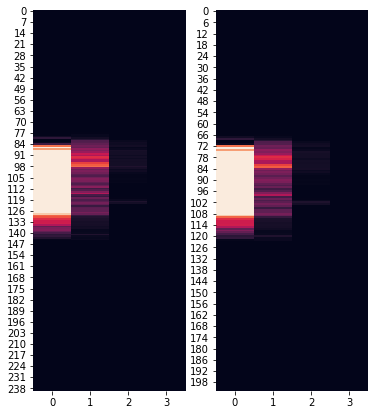

In [5]:
f, ax = plt.subplots(1, 2, figsize=(6,7))
sns.heatmap(np.squeeze(tonumpy(image))[0,:,:,0], cbar=False, ax=ax[0], vmin=0, vmax=1)
sns.heatmap(np.squeeze(tonumpy(scaled_image))[0,:,:,0], cbar=False, ax=ax[1], vmin=0, vmax=1)
plt.show()

Here we pad or crop the interpolated image

In [6]:
paded_or_croped_image = Encoder_M.pad_or_crop_im(None, scaled_image, image)  

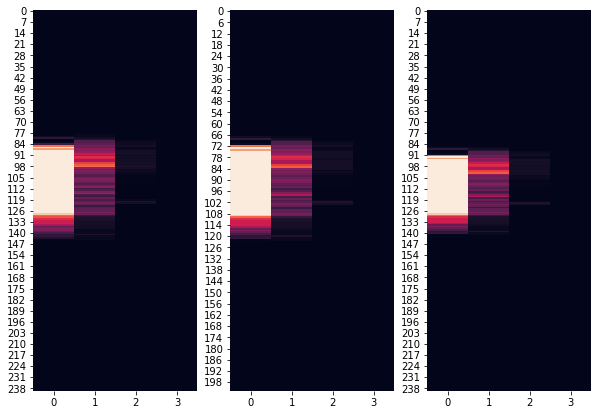

In [7]:
f, ax = plt.subplots(1, 3, figsize=(10,7))
sns.heatmap(np.squeeze(tonumpy(image))[0,:,:,0], cbar=False, ax=ax[0], vmin=0, vmax=1)
sns.heatmap(np.squeeze(tonumpy(scaled_image))[0,:,:,0], cbar=False, ax=ax[1], vmin=0, vmax=1)
sns.heatmap(np.squeeze(tonumpy(paded_or_croped_image))[0,:,:,0], cbar=False, ax=ax[2], vmin=0, vmax=1)

plt.show()

In [8]:
torch.Tensor(image).shape

torch.Size([741, 1, 240, 4, 2])

In [9]:
image = np.zeros((1, 1, 240, 4, 2))
image[0, 0, 100:140, :, 0] =  1
scaled_image = Encoder_M.aug_scale_im(None, torch.Tensor(image), 0.9)
paded_or_croped_image = Encoder_M.pad_or_crop_im(None, scaled_image, image)


<AxesSubplot:>

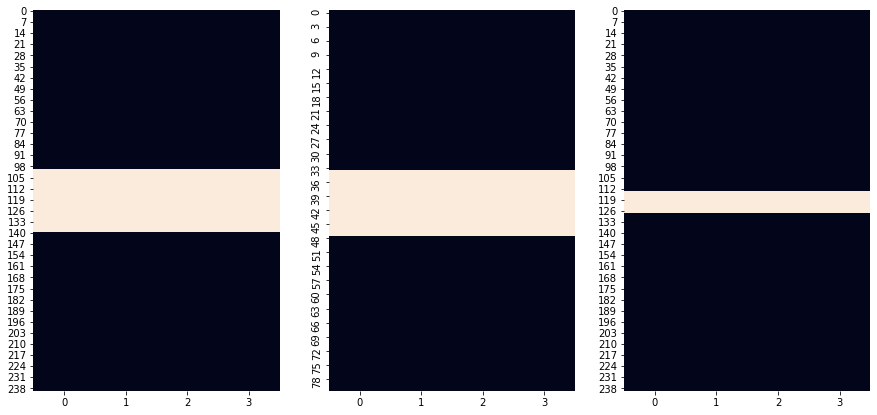

In [10]:
f, ax = plt.subplots(1, 3, figsize=(15,7))
sns.heatmap(np.squeeze((image))[:,:,0], cbar=False, ax=ax[0], vmin=0, vmax=1)
sns.heatmap(np.squeeze(tonumpy(scaled_image))[:,:,0], cbar=False, ax=ax[1], vmin=0, vmax=1)
sns.heatmap(np.squeeze(tonumpy(paded_or_croped_image))[:,:,0], cbar=False, ax=ax[2], vmin=0, vmax=1)

In [11]:
raw_image = undone_radial_correction(image)

0
1
2
3


<AxesSubplot:>

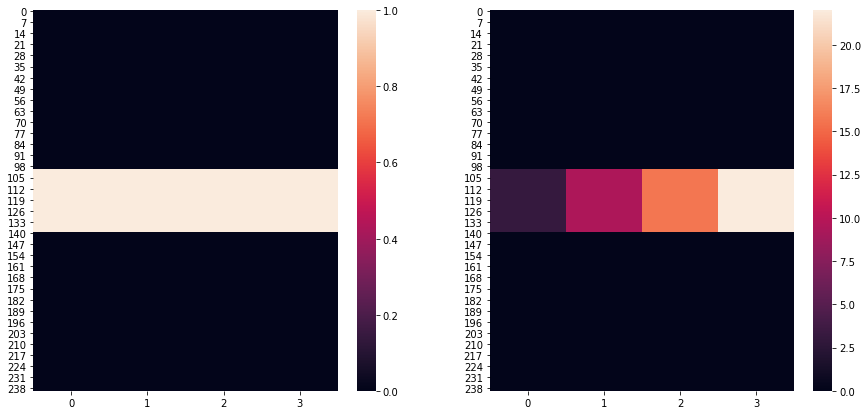

In [12]:
f, ax = plt.subplots(1, 2, figsize=(15,7))
sns.heatmap(np.squeeze((image))[:,:,0], cbar=True, ax=ax[0])
sns.heatmap(np.squeeze((raw_image))[:,:,0], cbar=True, ax=ax[1])